In [1]:
%matplotlib inline

In [2]:
import cartopy
import matplotlib.pyplot as P

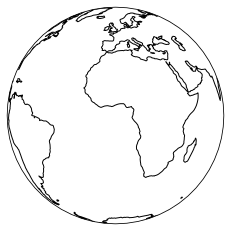

In [3]:
# Make sure we can plot a simple map with CartoPy
ortho = cartopy.crs.Orthographic()
fig = P.figure()
ax = fig.add_subplot(projection=ortho)
ax.coastlines()
fig.show()

In [4]:
# Get plate polygons from Corelle
from requests import get


# API call returns GeoJSON format plates
res = get("https://birdnest.geology.wisc.edu/corelle/api/plates?model=Wright2013")
features = res.json()

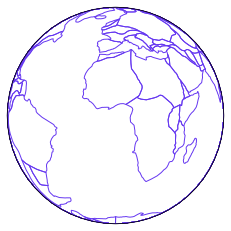

In [5]:
from shapely.geometry import shape

fig = P.figure()
ax = fig.add_subplot(projection=ortho)

geometries = [shape(f["geometry"]) for f in features]
ax.add_geometries(geometries, crs=cartopy.crs.Geodetic(), edgecolor="#6638f0", facecolor='none')
fig.show()

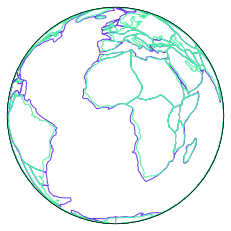

In [6]:
# API call returns GeoJSON format plates

res = get("https://birdnest.geology.wisc.edu/corelle/api/feature/ne_110m_land?model=Wright2013")
geometries = [shape(f["geometry"]) for f in res.json()]
ax.add_geometries(geometries, crs=cartopy.crs.Geodetic(), edgecolor="#4af2a1", facecolor="none")
fig

In [7]:
features[0]

{'id': 202,
 'properties': {'id': 4217,
  'plate_id': 202,
  'young_lim': 0,
  'old_lim': 600.0,
  'name': 'Parana Basin Plate, South America'},
 'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-54.3065697309999, -39.9785525659999],
     [-54.6479925589999, -40.312862418],
     [-62.2591400839999, -39.8864822829999],
     [-64.0420537629999, -39.4994955179999],
     [-64.2533767059999, -39.1296721709999],
     [-64.3400300739999, -37.3497015449999],
     [-64.0804546319999, -33.574621352],
     [-64.2536545009999, -32.1676300409999],
     [-63.8209610189999, -27.402604832],
     [-57.1066539129999, -29.6706413749999],
     [-55.1404348959999, -30.1981507899999],
     [-49.0062320319999, -31.7093648879999],
     [-51.7864551179999, -36.6206338939999],
     [-53.0331075599999, -38.0013349839999],
     [-53.5290875629999, -38.9932949909999],
     [-54.3065697309999, -39.9785525659999]]]]}}

# This is where the cool rotations stuff starts!

## Get and apply rotations at 50 Ma

In [9]:
rotations = get("https://birdnest.geology.wisc.edu/corelle/api/rotate?model=Wright2013&time=120&quaternion=true").json()
from corelle_helpers import rotate_features, rotate_geometry
import numpy as N

# Rotate our coastline featrues
feat = list(rotate_features(rotations, features))


fig = P.figure()
ax = fig.add_subplot(projection=ortho)

ax.add_geometries(feat, crs=cartopy.crs.Geodetic(), edgecolor="#4af2a1", facecolor="none")
fig.show()

TypeError: Unknown input to QUATERNION_setitem

In [ ]:
len(geometries)

In [ ]:
from geom_helpers import points_on_sphere

# Plot a (nearly) uniform distribution of points on a sphere
pt = points_on_sphere(50000)
ax.plot(pt[:, 0], pt[:, 1], "o", markersize=0.2, transform=cartopy.crs.Geodetic())
fig